<a href="https://colab.research.google.com/github/eentartetekunst/NGS_bioinformatics/blob/main/Copy_of_HW2_subread_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
! pip install -q condacolab

In [ ]:
import condacolab
condacolab.install()

In [ ]:
!conda install -y -c bioconda samtools

In [ ]:
! conda install -c bioconda subread 

In [ ]:
! sudo apt install bedtools

In [ ]:
! conda install -c bioconda regtools

In [ ]:
! sudo apt-get update
! sudo apt-get -y install hisat2

In [ ]:
! conda install -c bioconda stringtie 

## download genome and its annotation

In [ ]:
! wget http://ftp.ensembl.org/pub/release-107/fasta/mus_musculus/dna/Mus_musculus.GRCm39.dna.chromosome.19.fa.gz #chr19 sequence
! wget http://ftp.ensembl.org/pub/release-107/gtf/mus_musculus/Mus_musculus.GRCm39.107.gtf.gz # annotation
! gzip -d Mus_musculus.GRCm39.dna.chromosome.19.fa.gz # unarchieve files

! touch chr19-annotation 
! gzip -d Mus_musculus.GRCm39.107.gtf.gz > chr19-annotation 

# select chr 19 from the annotation
! touch chr19-annotation 
! grep -P '^19\t' /content/Mus_musculus.GRCm39.107.gtf > chr19-annotation 

--2022-11-04 16:30:54--  http://ftp.ensembl.org/pub/release-107/fasta/mus_musculus/dna/Mus_musculus.GRCm39.dna.chromosome.19.fa.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.139
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.139|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17732438 (17M) [application/x-gzip]
Saving to: ‘Mus_musculus.GRCm39.dna.chromosome.19.fa.gz’

Mus_musculus.GRCm39 100%[===================>]  16.91M   781KB/s    in 22s     

2022-11-04 16:31:17 (772 KB/s) - ‘Mus_musculus.GRCm39.dna.chromosome.19.fa.gz’ saved [17732438/17732438]

--2022-11-04 16:31:17--  http://ftp.ensembl.org/pub/release-107/gtf/mus_musculus/Mus_musculus.GRCm39.107.gtf.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.139
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.139|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31861821 (30M) [application/x-gzip]
Saving to: ‘Mus_musculus.GRCm39.107.gtf.gz’


In [ ]:
! head -n2 chr19-annotation

19	ensembl	gene	56265950	56266077	.	-	.	gene_id "ENSMUSG00000077223"; gene_version "3"; gene_name "Gm22271"; gene_source "ensembl"; gene_biotype "snoRNA";
19	ensembl	transcript	56265950	56266077	.	-	.	gene_id "ENSMUSG00000077223"; gene_version "3"; transcript_id "ENSMUST00000104035"; transcript_version "3"; gene_name "Gm22271"; gene_source "ensembl"; gene_biotype "snoRNA"; transcript_name "Gm22271-201"; transcript_source "ensembl"; transcript_biotype "snoRNA"; tag "basic"; transcript_support_level "NA (assigned to previous version 1)";


## extract coordinates of exons and splicing sites from the annotation

In [ ]:
! wget https://raw.githubusercontent.com/dekoning-lab/ezmap/master/tools/HISAT2/hisat2-2.0.5-Linux/extract_splice_sites.py
! chmod a+x extract_splice_sites.py
! ./extract_splice_sites.py 

--2022-11-04 16:32:04--  https://raw.githubusercontent.com/dekoning-lab/ezmap/master/tools/HISAT2/hisat2-2.0.5-Linux/extract_splice_sites.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5021 (4.9K) [text/plain]
Saving to: ‘extract_splice_sites.py’

extract_splice_site 100%[===================>]   4.90K  --.-KB/s    in 0s      

2022-11-04 16:32:04 (77.5 MB/s) - ‘extract_splice_sites.py’ saved [5021/5021]

usage: extract_splice_sites.py [-h] [-v] [gtf_file]

Extract splice junctions from a GTF file

positional arguments:
  gtf_file       input GTF file (use "-" for stdin)

optional arguments:
  -h, --help     show this help message and exit
  -v, --verbose  also print some statistics to stderr


In [ ]:
! wget https://raw.githubusercontent.com/dekoning-lab/ezmap/master/tools/HISAT2/hisat2-2.0.5-Linux/extract_exons.py
! chmod a+x extract_exons.py
! ./extract_exons.py

--2022-11-04 16:32:04--  https://raw.githubusercontent.com/dekoning-lab/ezmap/master/tools/HISAT2/hisat2-2.0.5-Linux/extract_exons.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5597 (5.5K) [text/plain]
Saving to: ‘extract_exons.py’

extract_exons.py    100%[===================>]   5.47K  --.-KB/s    in 0s      

2022-11-04 16:32:04 (39.6 MB/s) - ‘extract_exons.py’ saved [5597/5597]

usage: extract_exons.py [-h] [-v] [gtf_file]

Extract exons from a GTF file

positional arguments:
  gtf_file       input GTF file (use "-" for stdin)

optional arguments:
  -h, --help     show this help message and exit
  -v, --verbose  also print some statistics to stderr


In [ ]:
 # extract splicinge sites and exons from the annotation
! ./extract_splice_sites.py chr19-annotation > chr19.ss
! ! ./extract_exons.py chr19-annotation > chr19.exons 

# 1. Прокартируйте все образцы при помощи hisat2

In [ ]:
! hisat2-build --ss chr19.ss --exon chr19.exons Mus_musculus.GRCm39.dna.chromosome.19.fa base-index 

Settings:
  Output files: "base-index.*.ht2"
  Line rate: 7 (line is 128 bytes)
  Lines per side: 1 (side is 128 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Local offset rate: 3 (one in 8)
  Local fTable chars: 6
  Local sequence length: 57344
  Local sequence overlap between two consecutive indexes: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  Mus_musculus.GRCm39.dna.chromosome.19.fa
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:01
  Time to read SNPs and splice sites: 00:00:00
Generation 0 (58229592 -> 58229592 nodes, 0 ranks)
COUNTED NEW NODES: 0
COUNTED TEMP NODES: 0
RESIZED NODES: 1
RESIZED NODES: 0
MADE NEW NODES: 0
Generation 1 (582388

In [ ]:
%%shell 
reads_list='C14.5 B34 B14.5 C15.5 C17.5 B17.5 C34 B20 B15.5 C20' 
index='base-index'
fq='/content'

for i in ${reads_list}
do hisat2 --summary-file ${i}.log --no-softclip --no-unal -x ${index} -U ${fq}/${i}.fq.gz | samtools view -Sb - > ${i}.bam 
done

599461 reads; of these:
  599461 (100.00%) were unpaired; of these:
    49649 (8.28%) aligned 0 times
    538759 (89.87%) aligned exactly 1 time
    11053 (1.84%) aligned >1 times
91.72% overall alignment rate
599683 reads; of these:
  599683 (100.00%) were unpaired; of these:
    51939 (8.66%) aligned 0 times
    539715 (90.00%) aligned exactly 1 time
    8029 (1.34%) aligned >1 times
91.34% overall alignment rate
599672 reads; of these:
  599672 (100.00%) were unpaired; of these:
    47202 (7.87%) aligned 0 times
    540491 (90.13%) aligned exactly 1 time
    11979 (2.00%) aligned >1 times
92.13% overall alignment rate
600324 reads; of these:
  600324 (100.00%) were unpaired; of these:
    75959 (12.65%) aligned 0 times
    514263 (85.66%) aligned exactly 1 time
    10102 (1.68%) aligned >1 times
87.35% overall alignment rate
600268 reads; of these:
  600268 (100.00%) were unpaired; of these:
    59115 (9.85%) aligned 0 times
    531032 (88.47%) aligned exactly 1 time
    10121 (1.69

# 2. Соберите транскрипты при помощи stringtie для каждого образца используя аннотацию из ensembl (-G)

## for all of the samples

In [ ]:
%%shell 
reads_list='C14.5 B34 B14.5 C15.5 C17.5 B17.5 C34 B20 B15.5 C20' 
# sort reads by their genomic location using samtools
for i in ${reads_list}
do samtools sort -o  ${i}.s.bam  ${i}.bam 
done

In [ ]:
# -G <ref.gtf> a reference annotation file used to guide the assembly process
# build gtf annotation of reads

%%shell 
reads_list='C14.5 B34 B14.5 C15.5 C17.5 B17.5 C34 B20 B15.5 C20' 

for i in ${reads_list}
do stringtie -o ${i}.annotation.gtf -G Mus_musculus.GRCm39.107.gtf ${i}.s.bam
done

In [ ]:
! head B14.5.annotation.gtf

# stringtie -o B14.5.annotation.gtf -G Mus_musculus.GRCm39.107.gtf B14.5.s.bam
# StringTie version 2.2.1
19	StringTie	transcript	3133097	3137398	1000	+	.	gene_id "STRG.1"; transcript_id "STRG.1.1"; cov "2.314697"; FPKM "41.482002"; TPM "81.817490";
19	StringTie	exon	3133097	3133341	1000	+	.	gene_id "STRG.1"; transcript_id "STRG.1.1"; exon_number "1"; cov "2.361224";
19	StringTie	exon	3137331	3137398	1000	+	.	gene_id "STRG.1"; transcript_id "STRG.1.1"; exon_number "2"; cov "2.147059";
19	StringTie	transcript	3310774	3312089	1000	-	.	gene_id "STRG.2"; transcript_id "STRG.2.1"; cov "5.256909"; FPKM "94.209785"; TPM "185.815735";
19	StringTie	exon	3310774	3311635	1000	-	.	gene_id "STRG.2"; transcript_id "STRG.2.1"; exon_number "1"; cov "4.919954";
19	StringTie	exon	3311975	3312089	1000	-	.	gene_id "STRG.2"; transcript_id "STRG.2.1"; exon_number "2"; cov "7.782609";
19	StringTie	transcript	3314818	3332915	1000	-	.	gene_id "STRG.3"; transcript_id "STRG.3.1"; cov "5.645762"; FPKM "101.178474"

# 3. Перекартируйте риды используя новую аннотацию

Объединяем аннотации всех ридов

In [ ]:
! touch mergelist.txt
! ls *.annotation.gtf > mergelist.txt # stringtie annotations
! cat mergelist.txt

B14.5.annotation.gtf
B15.5.annotation.gtf
B17.5.annotation.gtf
B20.annotation.gtf
B34.annotation.gtf
C14.5.annotation.gtf
C15.5.annotation.gtf
C17.5.annotation.gtf
C20.annotation.gtf
C34.annotation.gtf


In [ ]:
! stringtie --merge -G Mus_musculus.GRCm39.107.gtf -o stringtie_merged.gtf mergelist.txt # merge stringtie annotations for all of the samples

### Извлекаем координаты экзонов и сайтов сплайсинга из новой аннотации

In [ ]:
 # ! cat stringtie.exon | awk ' $3 == "exon" {print $1 "\t" $4 "\t" $5 "\t" $7}' > stringtie_coords.exon

In [ ]:
! ./extract_splice_sites.py  stringtie_merged.gtf  >  stringtie_merged.ss
! ./extract_exons.py  stringtie_merged.gtf  >  stringtie_merged.exons 

In [ ]:
! awk ' $1 == 19' stringtie_merged.exons > chr19_stringtie_merged.exons

In [ ]:
! awk ' $1 == 19' stringtie_merged.ss > chr19_stringtie_merged.ss

In [ ]:
! head chr19_stringtie_merged.ss 

19	3103277	3109879	-
19	3109990	3119366	-
19	3118148	3119366	-
19	3119439	3122687	-
19	3122952	3125713	-
19	3122952	3246944	-
19	3125884	3246944	-
19	3133340	3137330	+
19	3196264	3197632	-
19	3196264	3203930	-


### Мы получили координаты экзонов из новой аннотации, теперь надо сделать картирование с ними:

## строим индекс по новым координатам из аннотации и картируем риды

In [ ]:
! hisat2-build --ss  chr19_stringtie_merged.ss --exon chr19_stringtie_merged.exons  Mus_musculus.GRCm39.dna.chromosome.19.fa stringtie_index

# chr19_stringtie_merged.ss -- splice sites coordinates
# chr19_stringtie_merged.exons -- exon coordinates

Settings:
  Output files: "stringtie_index.*.ht2"
  Line rate: 7 (line is 128 bytes)
  Lines per side: 1 (side is 128 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Local offset rate: 3 (one in 8)
  Local fTable chars: 6
  Local sequence length: 57344
  Local sequence overlap between two consecutive indexes: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  Mus_musculus.GRCm39.dna.chromosome.19.fa
Reading reference sizes
  Time reading reference sizes: 00:00:01
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:00
  Time to read SNPs and splice sites: 00:00:00
Generation 0 (58230279 -> 58230279 nodes, 0 ranks)
COUNTED NEW NODES: 0
COUNTED TEMP NODES: 0
RESIZED NODES: 0
RESIZED NODES: 0
MADE NEW NODES: 0
Generation 1 (5

In [ ]:
%%shell 
reads_list='C14.5 B34 B14.5 C15.5 C17.5 B17.5 C34 B20 B15.5 C20' 
index='stringtie_index'
fq='/content'

for i in ${reads_list}
do hisat2 --summary-file ${i}.log --no-softclip --no-unal -x ${index} -U ${fq}/${i}.fq.gz | samtools view -Sb - > ${i}.bam 
done

599461 reads; of these:
  599461 (100.00%) were unpaired; of these:
    49453 (8.25%) aligned 0 times
    538744 (89.87%) aligned exactly 1 time
    11264 (1.88%) aligned >1 times
91.75% overall alignment rate
599683 reads; of these:
  599683 (100.00%) were unpaired; of these:
    51785 (8.64%) aligned 0 times
    539583 (89.98%) aligned exactly 1 time
    8315 (1.39%) aligned >1 times
91.36% overall alignment rate
599672 reads; of these:
  599672 (100.00%) were unpaired; of these:
    46910 (7.82%) aligned 0 times
    540622 (90.15%) aligned exactly 1 time
    12140 (2.02%) aligned >1 times
92.18% overall alignment rate
600324 reads; of these:
  600324 (100.00%) were unpaired; of these:
    75768 (12.62%) aligned 0 times
    514179 (85.65%) aligned exactly 1 time
    10377 (1.73%) aligned >1 times
87.38% overall alignment rate
600268 reads; of these:
  600268 (100.00%) were unpaired; of these:
    58980 (9.83%) aligned 0 times
    530983 (88.46%) aligned exactly 1 time
    10305 (1.72

#  4. Оцените экспрессию генов в каждом образце при помощи Rsubread

In [ ]:
! featureCounts -a chr19-annotation -o /content/chr19_fc.txt  /content/*.s.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 10 BAM files                                     ||
||                           o B14.5.s.bam                                    ||
||                           o B15.5.s.bam                                    ||
||                           o B17.5.s.bam                                    ||
||                           o B20.s.bam                         

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
! touch chr19_fc.matrix.txt

In [ ]:
! cut -f1,7,8,9,10,11,12,13,14,15,16 chr19_fc.txt > chr19_fc.matrix.txt

In [ ]:
! tail -n +2 chr19_fc.matrix.txt > chr19_fc.matrix_trimmed.txt # remove header line
! head chr19_fc.matrix_trimmed.txt # count matrix

Geneid	/content/B14.5.s.bam	/content/B15.5.s.bam	/content/B17.5.s.bam	/content/B20.s.bam	/content/B34.s.bam	/content/C14.5.s.bam	/content/C15.5.s.bam	/content/C17.5.s.bam	/content/C20.s.bam	/content/C34.s.bam
ENSMUSG00000077223	0	0	0	0	0	0	0	0	0	0
ENSMUSG00000044387	0	0	0	0	3	0	0	0	0	0
ENSMUSG00000033863	46	60	188	449	4375	54	88	85	189	2934
ENSMUSG00000080626	0	0	0	0	3	0	0	0	0	1
ENSMUSG00000006456	740	826	651	474	298	468	673	507	520	310
ENSMUSG00000095913	15	10	8	12	5	16	7	9	5	8
ENSMUSG00000025075	1	5	9	1	0	1	0	5	4	0
ENSMUSG00000034108	194	167	180	162	144	191	191	226	176	203
ENSMUSG00000067872	9	10	16	27	43	12	12	19	30	4


In [ ]:
colnames = [ 'B14_5', 'B15_5', 'B17_5', 'B20', 'B34','C14_5', 'C15_5', 'C17_5', 'C20', 'C34']
df = pd.read_csv('chr19_fc.matrix_trimmed.txt', sep="\t", names=colnames)

In [ ]:
df.head()

,B14_5,B15_5,B17_5,B20,B34,C14_5,C15_5,C17_5,C20,C34
Geneid,/content/B14.5.s.bam,/content/B15.5.s.bam,/content/B17.5.s.bam,/content/B20.s.bam,/content/B34.s.bam,/content/C14.5.s.bam,/content/C15.5.s.bam,/content/C17.5.s.bam,/content/C20.s.bam,/content/C34.s.bam
ENSMUSG00000077223,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000044387,0,0,0,0,3,0,0,0,0,0
ENSMUSG00000033863,46,60,188,449,4375,54,88,85,189,2934
ENSMUSG00000080626,0,0,0,0,3,0,0,0,0,1


In [ ]:
df = df.drop(index='Geneid')
df

,B14_5,B15_5,B17_5,B20,B34,C14_5,C15_5,C17_5,C20,C34
ENSMUSG00000077223,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000044387,0,0,0,0,3,0,0,0,0,0
ENSMUSG00000033863,46,60,188,449,4375,54,88,85,189,2934
ENSMUSG00000080626,0,0,0,0,3,0,0,0,0,1
ENSMUSG00000006456,740,826,651,474,298,468,673,507,520,310
...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000121027,6,3,4,6,0,3,3,2,4,2
ENSMUSG00000087579,2,4,3,4,10,3,0,0,3,3
ENSMUSG00000108414,524,368,227,255,85,359,272,204,245,199
ENSMUSG00000097787,29,21,22,42,25,40,40,24,45,21


In [ ]:
for i in colnames:
  df[i] = df[i].astype(int) # convert dtype object to int

In [ ]:
# df = df.loc[~(df==0).all(axis=1)] # remove gene with zero read count in each of the samples

In [ ]:
df #сount matrix 

,B14_5,B15_5,B17_5,B20,B34,C14_5,C15_5,C17_5,C20,C34
ENSMUSG00000077223,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000044387,0,0,0,0,3,0,0,0,0,0
ENSMUSG00000033863,46,60,188,449,4375,54,88,85,189,2934
ENSMUSG00000080626,0,0,0,0,3,0,0,0,0,1
ENSMUSG00000006456,740,826,651,474,298,468,673,507,520,310
...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000121027,6,3,4,6,0,3,3,2,4,2
ENSMUSG00000087579,2,4,3,4,10,3,0,0,3,3
ENSMUSG00000108414,524,368,227,255,85,359,272,204,245,199
ENSMUSG00000097787,29,21,22,42,25,40,40,24,45,21


In [ ]:
df.to_csv('GeneWiseCounts.csv')

In [ ]:
df.corr(method='spearman').head()

,B14_5,B15_5,B17_5,B20,B34,C14_5,C15_5,C17_5,C20,C34
B14_5,1.000000,0.964350,0.953459,0.948221,0.922325,0.949813,0.942967,0.937570,0.940725,0.915633
B15_5,0.964350,1.000000,0.958826,0.954679,0.925216,0.952051,0.946680,0.942402,0.944137,0.919205
B17_5,0.953459,0.958826,1.000000,0.960035,0.936016,0.952240,0.951125,0.945644,0.950303,0.926545
B20,0.948221,0.954679,0.960035,1.000000,0.942834,0.943966,0.946856,0.947440,0.956100,0.929776
B34,0.922325,0.925216,0.936016,0.942834,1.000000,0.923239,0.923506,0.927029,0.943178,0.936514


[Text(0.5, 0, 'B14_5'),
 Text(1.5, 0, 'B15_5'),
 Text(2.5, 0, 'B17_5'),
 Text(3.5, 0, 'B20'),
 Text(4.5, 0, 'B34'),
 Text(5.5, 0, 'C14_5'),
 Text(6.5, 0, 'C15_5'),
 Text(7.5, 0, 'C17_5'),
 Text(8.5, 0, 'C20'),
 Text(9.5, 0, 'C34')]

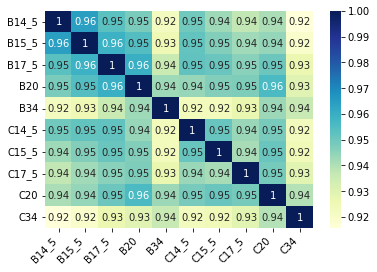

In [ ]:
ax = sns.heatmap(df.corr(method='spearman'), cmap="YlGnBu", annot=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

Образцы имеют корреляцию 1 сами с собой - показывает качество метода (?). На ранних стадиях развития образны из разных тканях сильнее коррелируют друг с другом, чем на поздних, что показывает дифференциацию тканей.

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

In [ ]:
df = df.T
df.head()

,ENSMUSG00000077223,ENSMUSG00000044387,ENSMUSG00000033863,ENSMUSG00000080626,ENSMUSG00000006456,ENSMUSG00000095913,ENSMUSG00000025075,ENSMUSG00000034108,ENSMUSG00000067872,ENSMUSG00000083282,...,ENSMUSG00000097779,ENSMUSG00000110156,ENSMUSG00000121016,ENSMUSG00000118100,ENSMUSG00000067577,ENSMUSG00000121027,ENSMUSG00000087579,ENSMUSG00000108414,ENSMUSG00000097787,ENSMUSG00000121055
B14_5,0,0,46,0,740,15,1,194,9,277,...,0,26,1,11,2,6,2,524,29,0
B15_5,0,0,60,0,826,10,5,167,10,357,...,1,14,4,5,0,3,4,368,21,0
B17_5,0,0,188,0,651,8,9,180,16,419,...,0,20,2,4,1,4,3,227,22,0
B20,0,0,449,0,474,12,1,162,27,446,...,0,27,1,3,0,6,4,255,42,0
B34,0,3,4375,3,298,5,0,144,43,699,...,0,45,1,2,0,0,10,85,25,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = list(df.columns) # Separating out the features - genes
x = df.loc[:, features].values

# Separating out the target
y = df.index
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components = 2)
pca = pca.fit_transform(x)

In [ ]:
df_pca = pd.DataFrame(pca, index = df.index, columns = ['PC1', 'PC2'])
#df_pca.reindex(df.index)
df_pca

,PC1,PC2
B14_5,-24.291709,14.132684
B15_5,-15.770520,3.930349
B17_5,-7.162017,-1.622945
B20,-1.053588,-10.576092
B34,28.563864,-5.536850
C14_5,-14.079201,12.483656
C15_5,-6.629119,-2.821716
C17_5,1.785017,-19.834188
C20,5.524918,-14.758252
C34,33.112357,24.603354


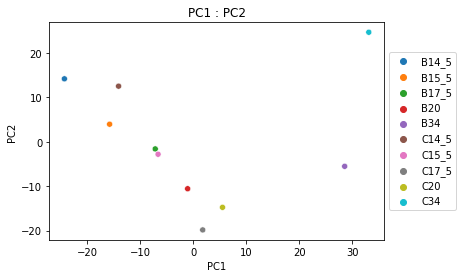

In [ ]:
fig = sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue=df_pca.index, legend='brief')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("PC1 : PC2") 
plt.show(fig)

In [ ]:
import plotly.express as px
sns.set_style("whitegrid", {'axes.grid' : False})

features = df.columns
pca = PCA()
components = pca.fit_transform(df[features])

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(3),
    color = df.index)


fig.update_traces(diagonal_visible=False)
fig.show()